In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
from scipy.stats import beta, binom, entropy
import random
import json
import copy
import math
import pickle
import statistics
from scipy import stats

# my modules
import scientist
import evaluation
import helper
import settings
import publisher

In [2]:
# global variables
num_bins = 15
num_draws = 10
num_participants = 10
num_generations = 30

# distribution of bins
bins_to_probs = {}
for i in range(0, num_bins):
    bins_to_probs[i] = np.random.uniform(low=0.0, high=1.0)

In [3]:
def make_participants(setting, alpha_value):
    participants = []

    for i in range (0, num_participants):
        if setting == "rate":
            report_set = settings.ReportingSetting("rate")
        elif setting == "data":
            report_set = settings.ReportingSetting("data")
        elif setting == "subset":
            report_set = settings.ReportingSetting("subset")

        # make participant
        participant = scientist.Participant(alpha=alpha_value, reporting_setting=report_set)
                        
        participants.append(participant)

    return(participants)

In [4]:
def run_experiment_distance_reported_true(setting, alpha_value, rel_pl_data_val, rel_pl_surprise_val, rel_pl_bias_val):
    scientific_record = {}
    for bin_num in range(0, num_bins):
        scientific_record[bin_num] = {} 
        scientific_record[bin_num][0] = 1
        scientific_record[bin_num][1] = 1
        
    avg_dist_per_gen = {}
    
    for generation in range(0, num_generations):       
        # each generation gets an entirely new set of participants
        participants = make_participants(setting, alpha_value)

        # scientists explore and submit reports
        for participant in participants:
            # sample
            for i in range(0, num_draws):
                bin_number, value = participant.sample(scientific_record, num_bins, bins_to_probs)

            # choose the bin
            bin_choice = participant.choose_bin(scientific_record, num_bins, num_draws)

            # make a report
            participant.report(num_bins, num_draws)
            
        # the peer review board selects reports for publication and returns the updated scientific record
        scientific_record, num_new, avg_dist = publisher.peer_review_distance_reported_true(participants, scientific_record, rel_pl_data_val, rel_pl_surprise_val, rel_pl_bias_val, num_draws)
        
#         kl_per_gen[generation] = evaluation.total_entropy_score(scientific_record, bins_to_probs)
        avg_dist_per_gen[generation] = avg_dist
    
    return(evaluation.arm_parameter_score(scientific_record, bins_to_probs), evaluation.total_entropy_score(scientific_record, bins_to_probs), avg_dist_per_gen)

In [5]:
gen_to_vals = {}
for i in range(0, num_generations):
    gen_to_vals[i] = []

for i in range(0, 100):
    print(i)
    _, _, curr = run_experiment_distance_reported_true("data", 0, 1, 0, 0)
    for key in curr:
        gen_to_vals[key].append(curr[key])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [6]:
avg_distance_per_gen_averaged = {}
for key in gen_to_vals:
    avg_distance_per_gen_averaged[key] = [sum(gen_to_vals[key]) / len(gen_to_vals[key]), stats.sem(gen_to_vals[key])]

In [11]:
gen_to_vals_surprise = {}
for i in range(0, num_generations):
    gen_to_vals_surprise[i] = []

for i in range(0, 100):
    print(i)
    _, _, curr = run_experiment_distance_reported_true("data", 0, 0, 1, 0)
    for key in curr:
        gen_to_vals_surprise[key].append(curr[key])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [12]:
avg_distance_per_gen_averaged_surprise = {}
for key in gen_to_vals_surprise:
    avg_distance_per_gen_averaged_surprise[key] = [sum(gen_to_vals_surprise[key]) / len(gen_to_vals_surprise[key]), stats.sem(gen_to_vals_surprise[key])]

In [15]:
gen_to_vals_positive = {}
for i in range(0, num_generations):
    gen_to_vals_positive[i] = []

for i in range(0, 100):
    print(i)
    _, _, curr = run_experiment_distance_reported_true("data", 0, 0, 0, 1)
    for key in curr:
        gen_to_vals_positive[key].append(curr[key])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [16]:
avg_distance_per_gen_averaged_positive = {}
for key in gen_to_vals_positive:
    avg_distance_per_gen_averaged_positive[key] = [sum(gen_to_vals_positive[key]) / len(gen_to_vals_positive[key]), stats.sem(gen_to_vals_positive[key])]

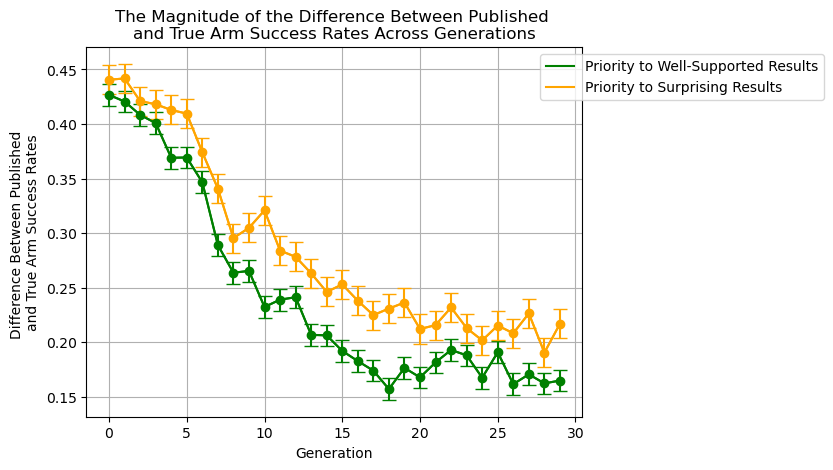

In [24]:
x = []

for gen_no in avg_distance_per_gen_averaged:
    x.append(gen_no)


y = []
y_surprise = []
y_positive = []
for gen_no in avg_distance_per_gen_averaged:
    y.append(avg_distance_per_gen_averaged[gen_no][0])
    y_surprise.append(avg_distance_per_gen_averaged_surprise[gen_no][0])
    y_positive.append(avg_distance_per_gen_averaged_positive[gen_no][0])

plt.plot(x, y, label=f"Priority to Well-Supported Results", color="green")
plt.errorbar(x, y, avg_distance_per_gen_averaged[gen_no][1], fmt='-o', capsize=5, color="green")
plt.plot(x, y_surprise, label=f"Priority to Surprising Results", color="orange")
plt.errorbar(x, y_surprise, yerr=avg_distance_per_gen_averaged_surprise[gen_no][1], fmt='-o', capsize=5, color="orange")
# plt.plot(x, y_positive, label=f"Priority to Positive Results", color="blue")
# plt.errorbar(x, y_positive, yerr=avg_distance_per_gen_averaged_positive[gen_no][1], fmt='-o', capsize=5, color="blue")


plt.xlabel('Generation')
plt.ylabel('Difference Between Published \nand True Arm Success Rates')
plt.title('The Magnitude of the Difference Between Published \nand True Arm Success Rates Across Generations')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

plt.grid(True)

plt.savefig('graphics/qualitative_avg_distance.pdf', format='pdf', bbox_inches='tight')
plt.show()